In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
titanic_df = pd.read_csv('D:/python_coding/datasets/titanic-training-data.csv')

In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Augustsson, Mr. Albert",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Analyse the Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

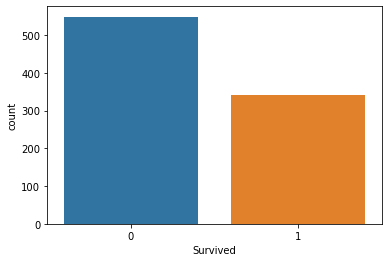

In [9]:
sns.countplot(x='Survived',data = titanic_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

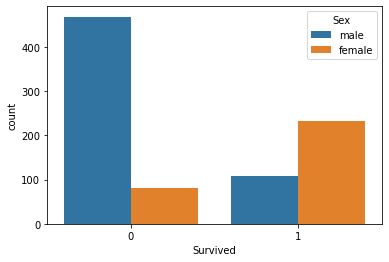

In [10]:
sns.countplot(x='Survived',hue='Sex',data = titanic_df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

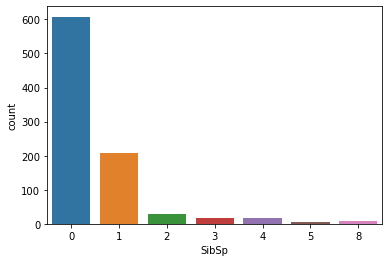

In [11]:
sns.countplot(x='SibSp',data = titanic_df)

### Data Wrangling

In [12]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

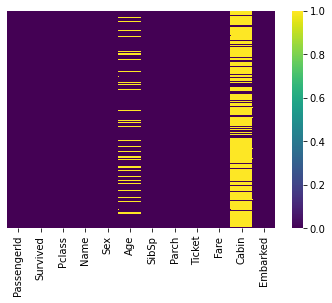

In [13]:
sns.heatmap(titanic_df.isnull(),yticklabels = False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

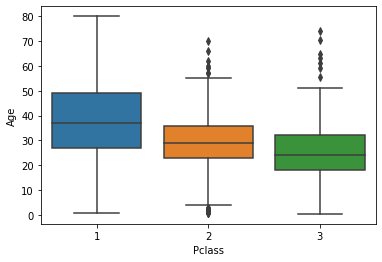

In [14]:
sns.boxplot(x='Pclass',y='Age',data = titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

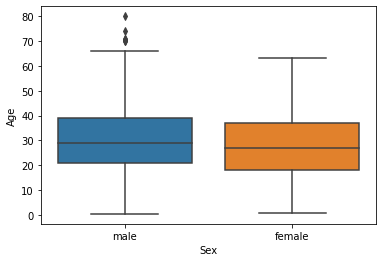

In [15]:
sns.boxplot(x='Sex',y='Age',data = titanic_df)

In [16]:
titanic_df.drop('Cabin',axis=1,inplace=True) # titanic_df = titanic_df.drop('Cabin',axis=1)

In [17]:
titanic_df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0,S


In [18]:
titanic_df.dropna(inplace=True)

In [19]:
titanic_df.shape

(712, 11)

In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


<AxesSubplot:>

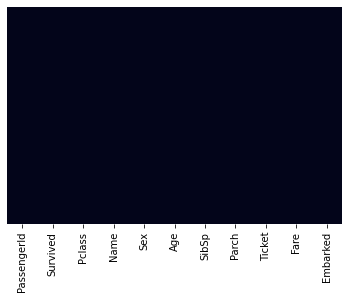

In [21]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False)

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
Sex = pd.get_dummies(titanic_df['Sex'])
Sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [24]:
Sex = pd.get_dummies(titanic_df['Sex'],drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [25]:
embark = pd.get_dummies(titanic_df['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [26]:
embark = pd.get_dummies(titanic_df['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [27]:
pc1 = pd.get_dummies(titanic_df['Pclass'])
pc1.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [28]:
pc1 = pd.get_dummies(titanic_df['Pclass'],drop_first=True)
pc1.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [29]:
titanic_df = pd.concat([titanic_df,Sex,embark,pc1],axis = 1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [30]:
titanic_df.drop(['PassengerId','Pclass','Name','Sex','Ticket','Fare','Embarked'],axis=1,inplace=True)
titanic_df.head()

,Survived,Age,SibSp,Parch,male,Q,S,2,3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,1,0,0
4,0,35.0,0,0,1,0,1,0,1


### Split the Data

In [31]:
x = titanic_df.drop('Survived',axis=1)
y = titanic_df['Survived']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 19)

### Fit the Model

In [33]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [34]:
predictions = model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.794392523364486

In [36]:
from sklearn import metrics

In [37]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       124
           1       0.79      0.70      0.74        90

    accuracy                           0.79       214
   macro avg       0.79      0.78      0.79       214
weighted avg       0.79      0.79      0.79       214



In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[107,  17],
       [ 27,  63]], dtype=int64)

<AxesSubplot:>

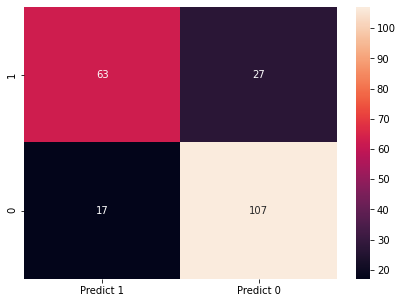

In [39]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
               columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

### How good the model is?

### Build Decision Tree Model

We will build our model using the decisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

### Scoring Decision Tree

In [42]:
print(dtree.score(x_train, y_train))
print(dtree.score(x_test, y_test))

0.9598393574297188
0.794392523364486


### Reducing over fitting (Regularization)

Can be done using 'gini' or 'entropy'.

### 1) Using 'gini'.

In [43]:
dtree = DecisionTreeClassifier(criterion = 'gini',max_depth = 2 , random_state = 1)
dtree.fit(x_train, y_train)
print(dtree.score(x_train, y_train))
print(dtree.score(x_test, y_test))

0.8032128514056225
0.7990654205607477


### 2) Using 'entropy'.

In [44]:
dtree1 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2 , random_state = 1)
dtree1.fit(x_train, y_train)
print(dtree1.score(x_train, y_train))
print(dtree1.score(x_test, y_test))

0.8032128514056225
0.7990654205607477


## Ensemble Learning - Bagging

In [53]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier( n_estimators=50, base_estimator=dtree, random_state=1)
#bgcl = BaggingClassifier(n_estimators=50, random_state=1)

bgcl = bgcl.fit(x_train, y_train)

0.794392523364486


<AxesSubplot:>

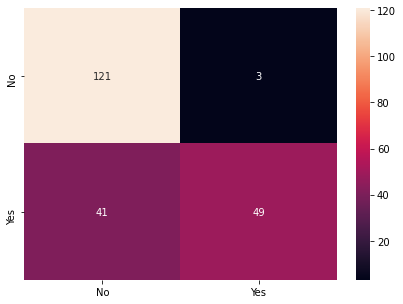

In [54]:
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test, y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                    columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True , fmt="g")

## Ensemble Learning - AdaBoosting

In [55]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
abcl = abcl.fit(x_train, y_train)

0.794392523364486


<AxesSubplot:>

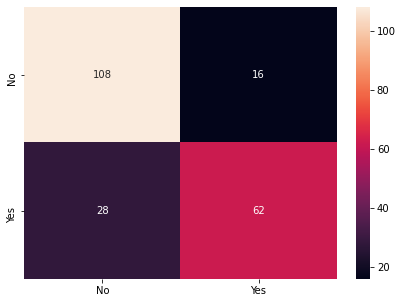

In [56]:
y_predict = abcl.predict(x_test)

print(abcl.score(x_test, y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                    columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True , fmt="g")

## Ensemble Learning - GradientBoost

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50, random_state=1)
#gbcl = AdaBoostClassifier(n_estimators=50, random_state=1)
gbcl = gbcl.fit(x_train, y_train)

0.8177570093457944


<AxesSubplot:>

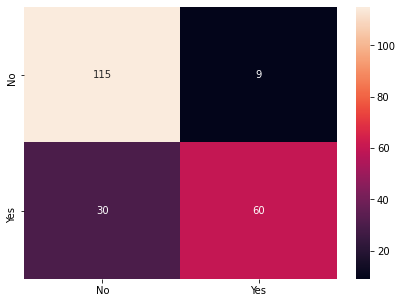

In [60]:
y_predict = gbcl.predict(x_test)

print(gbcl.score(x_test, y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                    columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True , fmt="g")

## Ensemble RandomForest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=50, random_state=1,max_features = 5)
rfcl = rfcl.fit(x_train, y_train)

0.8037383177570093


<AxesSubplot:>

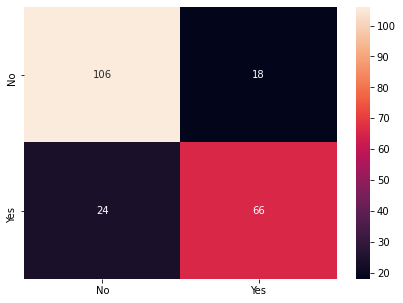

In [70]:
y_predict = rfcl.predict(x_test)

print(rfcl.score(x_test, y_test))

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                    columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True , fmt="g")